In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import re
import os

plt.rcParams['font.size'] = '16'

def plot_validation_mcc(base_path, param_name="n"):
    # Find all metrics.csv files
    metric_paths = glob(f"{base_path}/validate/{param_name}_*/**/metrics.csv", recursive=True)

    records = []

    for path in metric_paths:
        try:
            # Extract parameter n and biolm from the path
            match_param = re.search(fr"{param_name}_([0-9]*\.?[0-9]+)", path)
            biolm = path.split(os.sep)[-2]  # [base_path]/n_[param_n]/[biolm]/validate/metrics.csv
            
            if not match_param:
                continue

            n_val = float(match_param.group(1))
            df = pd.read_csv(path)
            mcc = df["mcc"].iloc[-1]  # last epoch's mcc (or use 0 if only 1 epoch)

            records.append({
                param_name: n_val,
                "biolm": biolm,
                "mcc": mcc
            })
        except Exception as e:
            print(f"Skipping {path}: {e}")
            continue

    if not records:
        raise ValueError("No valid metric files found.")

    result_df = pd.DataFrame(records)
    result_df[param_name] = result_df[param_name].astype(float)
    result_df = result_df.sort_values(by=['mcc'])
    print(result_df)
    
    # Plot
    plt.figure(figsize=(10, 6), dpi=200)
    sns.lineplot(
        data=result_df,
        x=param_name,
        y="mcc",
        hue="biolm",
        marker="o",
        palette="colorblind"
    )

    plt.title("Validation MCC to choose a threshold parameter n")
    plt.xlabel(param_name)
    plt.ylabel("score")
    plt.ylim((-0.05, 1))
    plt.legend(title="BioLM", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()



          n biolm      mcc
13  2.00000  MINT  0.00000
19  3.00000  MINT  0.00000
7   1.00000  MINT  0.12734
18  3.00000  ESM2  0.13245
12  2.00000  ESM2  0.22557
11  0.03125  gLM2  0.30302
6   1.00000  ESM2  0.36564
1   0.50000  MINT  0.36564
23  0.06250  gLM2  0.37870
20  3.00000  gLM2  0.41052
8   1.00000  gLM2  0.41779
16  0.25000  MINT  0.42538
9   0.03125  ESM2  0.42563
3   0.12500  ESM2  0.42563
21  0.06250  ESM2  0.42563
2   0.50000  gLM2  0.43161
17  0.25000  gLM2  0.43161
5   0.12500  gLM2  0.43632
14  2.00000  gLM2  0.43900
4   0.12500  MINT  0.45406
15  0.25000  ESM2  0.45406
10  0.03125  MINT  0.45406
0   0.50000  ESM2  0.45406
22  0.06250  MINT  0.45406


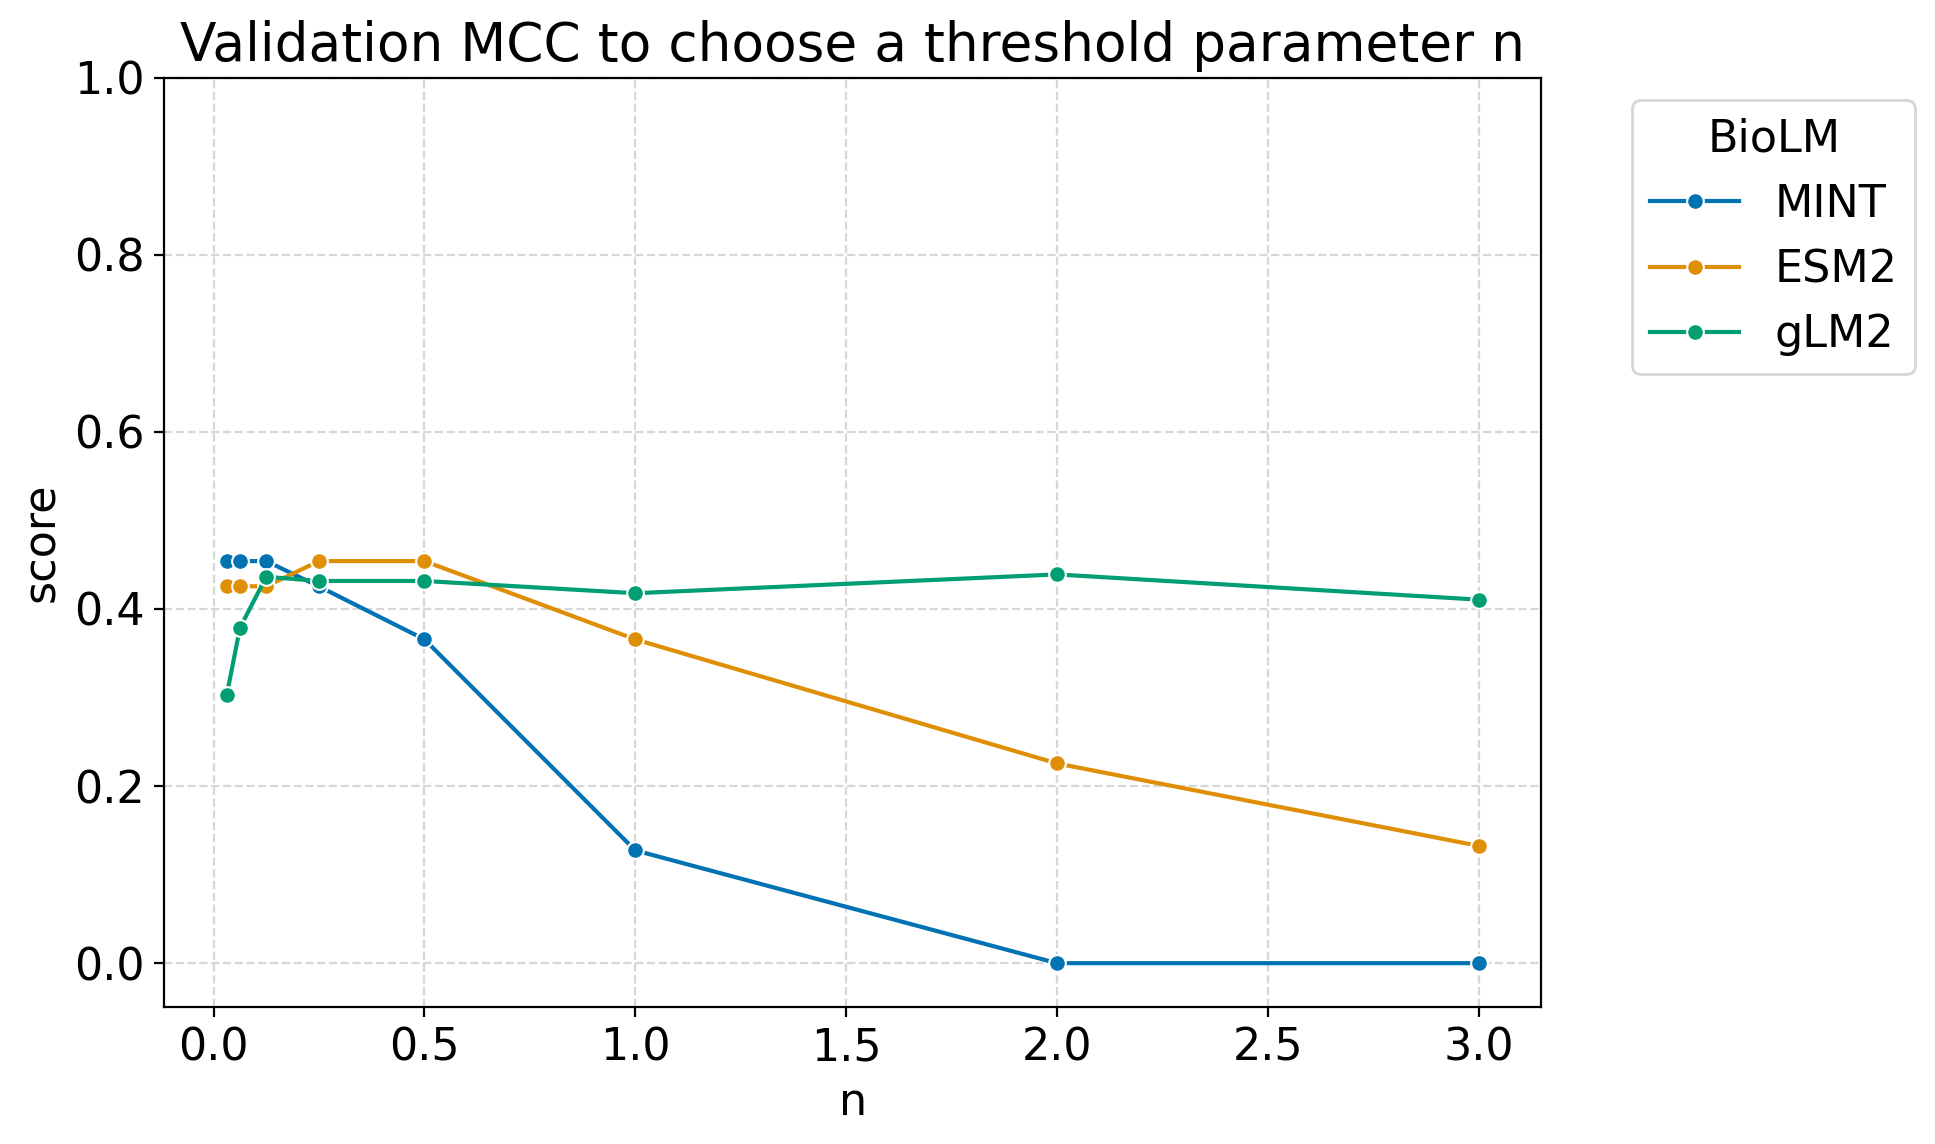

In [4]:
plot_validation_mcc("../logs/gLM.models.CategoricalJacobian/PINDER/eubacteria_5_1024_512_species_heterodimers/cosine_fast_categorical_jacobian/")